## 아마존닷컴 데이터 (2023년 데이터) 실습
- 아래 제시된 문제를 해결한 후(참고. Bass 확산 모형 은 제외), 해당 내용에 대한 보고서를 챗GPT를 이용하여 PPT로 생성
 - 노트의 설명 및 코드, 그리고 결과나 그림을 붙여넣으신 후 PPT 자료 생성을 시키시면 됩니다.
 - 가급적 슬라이드별로 PPT를 생성시키시는 것이 좋습니다.

- 실습 시간: 2시 40분-4시 50분

- ppt의 구성:
 - page1: 본 실습의 개요
 - page2: 사용 데이터에 대한 설명
 - page3: 변수 처리에 대한 설명 및 결과
 - page4-5: 분류모형 적용 과정 및 성능에 대한 해석
 - page6-7: 시계열 적용을 위한 데이터 처리에 대한 설명, 시계열 적용 및 성능에 대한 해석
 - page8-9: 추천 적용 과정 및 성능에 대한 해석
 - page10: 결론

- 적용 시 구체화된 카테고리나, 세부 아이템에 대해 필터링하셔서 적용하셔도 됩니다.
- 디자인은 PPT의 테마 등으로 간단하게만 적용해주세요
- PPT와 ipynb 파일을 won.sang.l@gmail.com으로 오후4시 50분까지 보내주세요.

### 1) 데이터 읽기
- https://amazon-reviews-2023.github.io/
- 리뷰 데이터 및 메타데이터 다운로드 (jsonl 형식): 카테고리는 적절한 것을 선택해주세요.

In [ ]:
import json
import pandas as pd

reviews=[]

file = "Gift_Cards.jsonl"# e.g., "All_Beauty.jsonl", downloaded from the `review` link above
with open(file, 'r') as fp:
    for line in fp:
        reviews.append(json.loads(line.strip()))

In [ ]:
review_df = pd.DataFrame(reviews)
review_df.head()
#asin, user_id, timestamp, rating 처리

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Great gift,Having Amazon money is always good.,[],B00IX1I3G6,B00IX1I3G6,AHZ6XMOLEWA67S3TX7IWEXXGWSOA,1549866158332,0,True
1,5.0,amazon gift card,Always the perfect gift. I have never given o...,[],B005ESMMWW,B005ESMMWW,AFZUK3MTBIBEDQOPAK3OATUOUKLA,1599875158120,0,False
2,5.0,perfect gift,When you have a person who is hard to shop for...,[],B01K8RIM5Y,B005S28ZES,AFZUK3MTBIBEDQOPAK3OATUOUKLA,1535939929239,27,True
3,5.0,Nice looking,The tin is a nice touch and pretty large. It'...,[],B0091JKVU0,B00ADR2LV6,AFZUK3MTBIBEDQOPAK3OATUOUKLA,1418439577000,0,False
4,1.0,Not $10 Gift Cards,I bought this pack of Starbucks Gift cards in ...,[],B00FTGTM5E,B00FTGTIOE,AH5L7ILVA6HYLZOUZIQAWNHVVK3A,1638068808115,2,True


In [ ]:
meta = []

file = "meta_Gift_Cards.jsonl"# e.g., "meta_All_Beauty.jsonl", downloaded from the `meta` link above
with open(file, 'r') as fp:
    for line in fp:
        meta.append(json.loads(line.strip()))

In [ ]:
meta_df = pd.DataFrame(meta)
meta_df.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Gift Cards,Amazon.com Gift Card in Gift Tag (Various Desi...,4.8,1006,"[Gift Card is affixed inside a gift tag, Gift ...",[Amazon.com Gift Cards are the perfect way to ...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Amazon,"[Gift Cards, Gift Card Recipients, For Him]",{'Package Dimensions': '5 x 3 x 0.1 inches; 0....,B06ZXTKYHN,None,NaN,NaN
1,Gift Cards,$25 Mastercard Gift Card (plus $3.95 Purchase ...,2.5,11,[This card is non-reloadable. No expiration of...,[Mastercard Gift Cards are the ideal gift – to...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Mastercard,"[Gift Cards, Gift Card Categories, Specialty C...","{'Is Discontinued By Manufacturer': 'No', 'Pac...",B07FX2LXR4,None,NaN,NaN
2,Gift Cards,Tractor Supply Company Gift Card,4.9,2708,[Tractor Supply Company is the largest operato...,[Tractor Supply Company is the largest operato...,50.0,[{'thumb': 'https://m.media-amazon.com/images/...,[],Tractor Supply Company,"[Gift Cards, Gift Card Categories, Home Improv...",{'Package Dimensions': '5.2 x 4 x 0.01 inches;...,B01GKWEISG,None,NaN,NaN
3,Gift Cards,Staples Gift Card,4.8,351,[Staples Gift Cards - Giving the perfect gift ...,[Giving the perfect gift has never been easier...,50.0,[{'thumb': 'https://m.media-amazon.com/images/...,[],STAPLES,"[Gift Cards, Gift Card Categories, Electronics...",{'Package Dimensions': '5.2 x 3.98 x 0.47 inch...,B00GOLH2S2,None,NaN,NaN
4,Gift Cards,Ninety Nine Restaurants Gift Card,4.8,443,[Ninety Nine Restaurants are a comfortable pla...,[The Ninety Nine Restaurants is a comfortable ...,50.0,[{'thumb': 'https://m.media-amazon.com/images/...,[],Ninety Nine Restaurants,"[Gift Cards, Gift Card Categories, Restaurants]",{'Package Dimensions': '5.24 x 3.94 x 0.28 inc...,B00BXLV3RO,None,NaN,NaN


In [ ]:
meta_df['description'] = meta_df.description.astype(str).replace("\[|\]|\n","", regex=True)

In [ ]:
merged = pd.merge(review_df, meta_df, left_on='asin', right_on = "parent_asin")

In [ ]:
merged.shape

(78095, 26)

### 2) Feature 생성
- 제품 Description으로 부터 Feature를 생성
- TfidfVectorizer를 사용할 수 있음
- Y변수는, rating에 기준을 적용하여 binary로 생성
- 파티셔닝, 스케일링 등 필요 시 적용

In [ ]:
#description에 대한 DTM 생성
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
dtm = vectorizer.fit_transform(merged['description'])

In [ ]:
merged["target"] = merged["rating"].apply(lambda x: 1 if x >= 4 else 0)

### 3) 분류모형 적용
- 앙상블 모형, DNN으로 분류 후 비교
- 두 경우 모두 파라미터 탐색을 수행

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit( dtm,merged['target'])

RandomForestClassifier()

### 4) 시계열 분석
- 파티셔닝: 최근 일자의 값 100개를 테스트셋으로 지정
- LSTM, ARIMA, Prophet 등을 활용하여 시계열 분석
- MSE(또는 RMSE)로 성능 측정

In [ ]:
review_df["time"]=pd.to_datetime(review_df["timestamp"], unit='ms') #13자리 time stamp
review_df.time.head()

,time
0,2019-02-11 06:22:38.332
1,2020-09-12 01:45:58.120
2,2018-09-03 01:58:49.239
3,2014-12-13 02:59:37.000
4,2021-11-28 03:06:48.115


In [ ]:
review_df["good_quality"] = review_df["rating"].apply(lambda x: 1 if x >= 3 else 0)
review_df["day"] = review_df["time"].dt.month #day_of_year
review_df["year"] = review_df["time"].dt.year
review_df["time2"] = review_df["year"].astype(str) + "-" + review_df["day"].astype(str)

In [ ]:
review_df.groupby("time2")["good_quality"].sum()

### 5) 추천 알고리즘 적용
- CF 기법, 유사도 계산, 임베딩 기법 등을 사용하여 같은 아이템에 대한 결과 비교
- CF 기법의 다양한 파라미터 조합에 대한 성능 비교(파티셔닝 적용)



In [ ]:
from surprise import SVD, Dataset
from surprise.model_selection import train_test_split

# 데이터 로딩
data = Dataset.load_builtin('ml-100k')
trainset, testset = train_test_split(data, test_size=0.25)

# 모델 학습
algo = SVD()
algo.fit(trainset)

# 예측 수행
prediction = algo.predict(uid='196', iid='302')
print(prediction)

### 참고1: 2007-2008 분류 모델링, 2009 적용

###  참고2: Bass 확산 모형

In [ ]:
data = pd.read_csv("Electric_Vehicle_Population_Data.csv")
data.shape

(200048, 17)

In [ ]:
data.Make.value_counts()
#kia
data = data.query( "Make=='KIA'")

In [ ]:
data["Model Year"].value_counts()

In [ ]:
data1

,count
Model Year,
2015,20
2016,367
2017,196
2018,298
2019,689
2020,560
2021,64
2022,2079
2023,2648


In [ ]:
data1 = data["Model Year"].value_counts()
data1 = data1.sort_index()
df = pd.DataFrame(data1[0:9])
df["count"]

,count
Model Year,
2015,20
2016,367
2017,196
2018,298
2019,689
2020,560
2021,64
2022,2079
2023,2648


In [ ]:
import scipy.optimize as optimization
import numpy as np

y = df["count"].values
t = np.arange(0,9)
start = np.array([300000, 0.01, 0.05])


In [ ]:
def f(t,M, P, Q):
    num = M * ((P+Q)**2/P)*np.exp(-(P+Q)*t)
    denom = (1+(Q/P)*np.exp(-(P+Q)*t))**2
    return num/denom

result = optimization.curve_fit(f, t, y, start, maxfev=5000)
M, p, q = result[0]

In [ ]:
p, q

(2.346313998876349e-07, 0.5392357912441703)

In [ ]:
bass = f(np.arange(0,29),M, p, q)
bass

array([3.62916366e+01, 6.22290991e+01, 1.06703897e+02, 1.82964451e+02,
       3.13727498e+02, 5.37944512e+02, 9.22403003e+02, 1.58161609e+03,
       2.71191786e+03, 4.64989962e+03, 7.97253067e+03, 1.36686017e+04,
       2.34320116e+04, 4.01626512e+04, 6.88193536e+04, 1.17865130e+05,
       2.01694717e+05, 3.44649962e+05, 5.87480462e+05, 9.97213259e+05,
       1.68071701e+06, 2.79899938e+06, 4.56952489e+06, 7.22234307e+06,
       1.08483597e+07, 1.51019067e+07, 1.89264884e+07, 2.08110377e+07,
       1.98264041e+07])

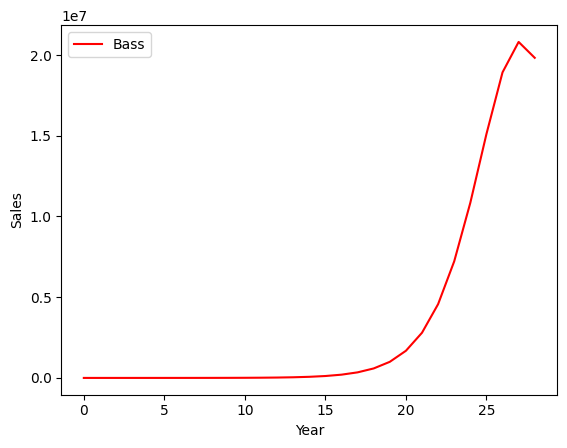

In [ ]:
# 시각화
import matplotlib.pyplot as plt
#plt.plot(t,df["count"], label='Actual', color='blue')
plt.plot( np.arange(0,29),bass, label='Bass', color='red')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(loc='upper left')
plt.show()

In [ ]:
bass = f(np.arange(0,30),100000, 0.5, 0.1)
bass

array([5.00000000e+04, 3.20845425e+04, 1.92917532e+04, 1.11519682e+04,
       6.30097384e+03, 3.51433314e+03, 1.94598132e+03, 1.07323437e+03,
       5.90596005e+02, 3.24607117e+02, 1.78293335e+02, 9.78932231e+01,
       5.37381290e+01, 2.94960841e+01, 1.61889912e+01, 8.88506729e+00,
       4.87633692e+00, 2.67622315e+00, 1.46875226e+00, 8.06071299e-01,
       4.42382202e-01, 2.42784769e-01, 1.33243188e-01, 7.31254362e-02,
       4.01320976e-02, 2.20249644e-02, 1.20875574e-02, 6.63379236e-03,
       3.64070250e-03, 1.99805991e-03])